Introduction
--------------

DICOM is the most popular standard used in medicine for image exchange. The name is derived from **D**igital **I**maging and **CO**mmunication in **M**edicine. It allows to have medical information in the images as a standard file that is independent from the manufacturer. This means that it is possible to have images from MR scanners made by a GE system and display it in a  picture archive system (PACS) from Agfa without any loss or without need of any proprietary information. It also allows opening the image in MATLAB, Python or any language without need to know how GE formatted the image file.

We will open here a DICOM image and see some of the information that is stored in the header of the image. You will have for your assignment to retrieve other information from this same image.

Python provides some tools for DICOM image opening in the package **PyDICOM**.

Your installation will likely be missing this package, so you can install it using Anaconda. Open an Anaconda Prompt and type **pip install pydicom**. The version that would likely be installed is pydicom-0.9.9

In [7]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('US-MONO2-8-8x-execho.dcm')
# Let's print all the Metadata here
print(RefDs)




(0008, 0000) Group Length                        UL: 342
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TTE', '0001']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19941105.134500.2.101
(0008, 0020) Study Date                          DA: '1994.11.05'
(0008, 0023) Content Date                        DA: '1994.11.05'
(0008, 0030) Study Time                          TM: '13:45:00'
(0008, 0060) Modality                            CS: 'US'
(0008, 0070) Manufacturer                        LO: 'Acme Products'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1030) Study Description                   LO: 'Exercise Echocardiogram'
(0008, 103e) Series Description                  LO: 'Post-Stress'
(0008, 2120) Stage Name                          SH: 'Post-Exercise'
(0008, 2122) Stage Number                        IS: '2'
(0008, 2124) Nu

You can browse through that Metadata and see all the information about this image. We can already easily find out this was a Magnetic Resonance Image made with a Philips system.

Let's answer the following questions with the Metadata:
* What is the size in pixels of the image? There are two ways to obtain this information, find them both.
* What is the number of bits used to encode the image?
* What is the full name of the vendor and the model of the scanner used to do this image?
* When was this image taken? Is this consistent with the file date?
* Which body part was the focus of the study? 
* Was the subject a man or a woman?
* Can you find the patient name in this particular example? Why?


Since this is an educational image, the volunteer's privacy is protected by never entering the name in the DICOM image. We can now exchange the image without any issues.

Let's now show the image. First, we need to dimension an array with all the pixels in the image. Then, we can load the information and then show the image.

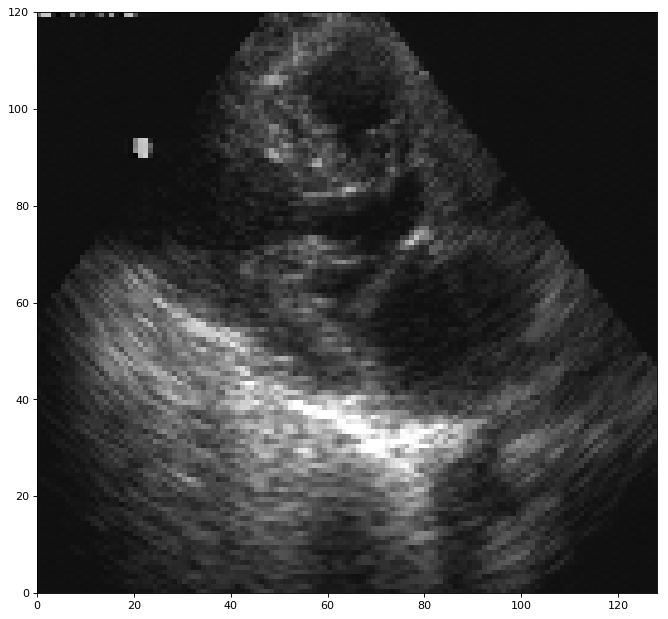

In [8]:
ConstPixelDims = (int(RefDs.BitsStored), int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('US-MONO2-8-8x-execho.dcm')
ArrayDicom[:,:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale


plt.pcolormesh( np.flipud(ArrayDicom[7,:, :]))


## Summary

In this example we learned how to open and display a DICOM image and how to access Metadata in the DICOM file.

Test your knowledge:

* Add a title to the figure where you show the date of acquisition and the organ that was imaged (obtain this information from the metadata in the DICOM.
* Why was it needed to add the line **from datetime import datetime** in the code?
* Make that image larger in the screen (you have some code to do this from older notebooks!)
* Make this image interactive and play with the interactive tools

Comments and corrections welcome!

References
---------------

* https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/